# Pymaceuticals Inc.
---
### Analysis

- Ten drugs regimens for treating tumors in mice were analyzed for this project. Of the ten drug regimens Capomulin and Ramicane had the lowest average tumor volume with Capomulin coming in at 40.675741mm3 and Ramicane at 40.216745mm3. Ketapril and Naftisol had the highest average tumor volumes with Ketapril at 55.235638mm3 and Naftisol at 54.331565mm3. 
- We found that there was a correalation between the mouses weight and tumor volume. The more the mouse weighed the larger the volume of the tumor. The correlation value came in at 0.84.
- Ramicane and Capomulin could be two drug regimens to further study as they seemed to have the strongest affect on decreasing the volume of the tumor. 	
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results,mouse_metadata,on="Mouse ID")

# Display the data table for preview
mouse_study.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.

mice = len(mouse_study["Mouse ID"].unique())
mice



249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicates = mouse_study[mouse_study[["Mouse ID","Timepoint"]].duplicated() == True]
mice_duplicate = duplicates["Mouse ID"].unique()
mice_duplicate


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_info = mouse_study[mouse_study["Mouse ID"] == mice_duplicate[0]]
duplicate_info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_mice = mouse_study[mouse_study["Mouse ID"] != "g989"]
clean_mice.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count = len(clean_mice["Mouse ID"].unique())
mouse_count

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.


mean_tumor_volume = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_volume_variance = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_std = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_volume_regimen = pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume,"Median Tumor Volume":median_tumor_volume,"Tumor Volume Variance":tumor_volume_variance
                                     ,"Tumor Volume Std. Dev.":tumor_std,"Tumor Volume Std. Err.":tumor_sem})
tumor_volume_regimen

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
aggregation_stats = clean_mice.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean","median","var","std","sem"])

#worked with Conner Dekok and Nick Fussy on retreiving the title for the stats
aggregation_stats_title = pd.DataFrame(aggregation_stats)
aggregation_stats_title.columns = pd.MultiIndex.from_product([["Tumor Volume (mm3)"],aggregation_stats_title.columns])
aggregation_stats_title

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

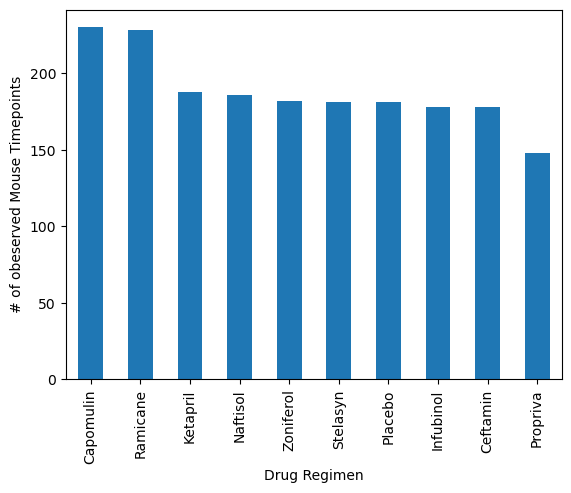

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = clean_mice["Drug Regimen"].value_counts()
drug_counts.plot(kind= "bar", xlabel = "Drug Regimen", ylabel="# of obeserved Mouse Timepoints")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

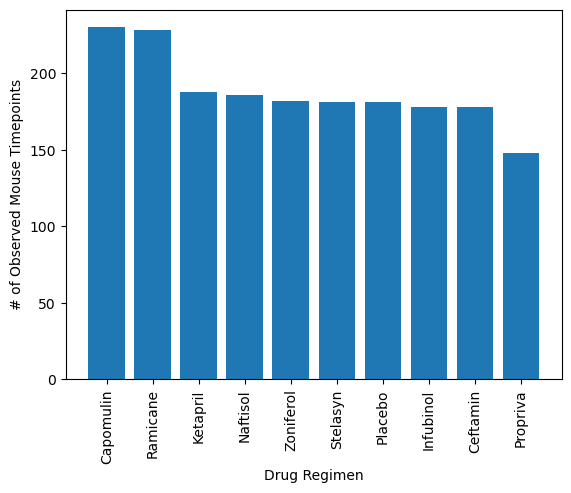

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drugs_x = drug_counts.index.values
count_y = drug_counts.values

plt.bar(drugs_x,count_y, align="center")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)
plt.show

<Axes: ylabel='Count'>

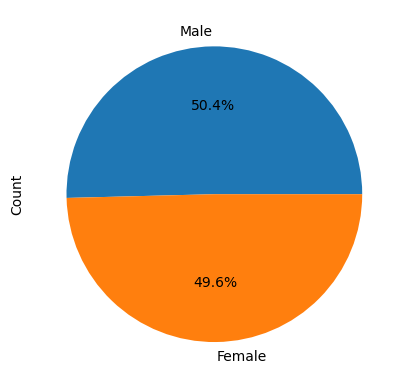

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
unique_mice = clean_mice.drop_duplicates(subset="Mouse ID")


female_male = unique_mice["Sex"].value_counts()
female_male.plot(kind= "pie",autopct="%1.1f%%", ylabel = "Count")



# Make the pie chart

<function matplotlib.pyplot.show(close=None, block=None)>

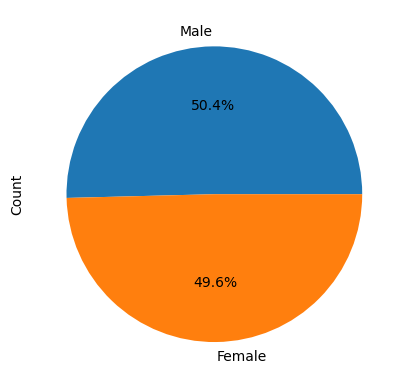

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
count = unique_mice["Sex"].value_counts()

plt.pie(count, labels = count.index, autopct= "%1.1f%%")
plt.ylabel("Count")
plt.show

# Make the pie chart

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
drug_select = clean_mice.loc[(clean_mice["Drug Regimen"] == "Capomulin") | (clean_mice["Drug Regimen"] == "Ramicane") | (clean_mice["Drug Regimen"] == "Infubinol") | (clean_mice["Drug Regimen"] == "Ceftamin")]
# Start by getting the last (greatest) timepoint for each mouse
regimen_final = drug_select.groupby("Mouse ID")["Timepoint"].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoin
merge_regimen = pd.merge(regimen_final,clean_mice, on=("Mouse ID","Timepoint"),how="left")
merge_regimen


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
upperqs = []
lowerqs = []
iqr_values = []
outlier_dict = {}


# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
   
    treatment_data = merge_regimen[merge_regimen["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol.append(treatment_data)  
    quartiles = treatment_data.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    upperqs.append(upperq)
    lowerqs.append(lowerq)
    iqr_values.append(iqr)
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    outlier_dict[treatment] = outliers


print("Outliers by Treatment:")
for treatment, outliers in outlier_dict.items():
    print(f"{treatment}: {outliers.tolist()}")

Outliers by Treatment:
Capomulin: []
Ramicane: []
Infubinol: [36.3213458]
Ceftamin: []


<function matplotlib.pyplot.show(close=None, block=None)>

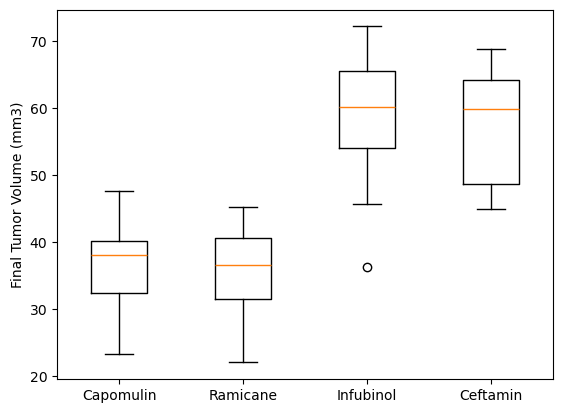

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()

ax1.boxplot(tumor_vol,labels=treatments)
ax1.set_ylabel("Final Tumor Volume (mm3)")
plt.show

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

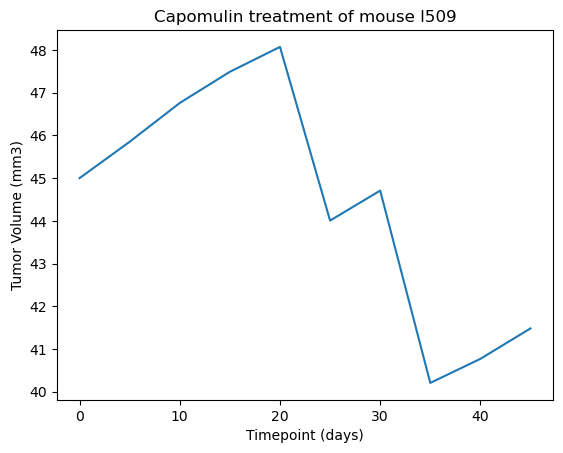

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = clean_mice.loc[(clean_mice["Mouse ID"] == "l509") ]
capomulin_data = mouse_l509[["Timepoint","Tumor Volume (mm3)"]]

time = capomulin_data["Timepoint"].values
tummor = capomulin_data["Tumor Volume (mm3)"].values

plt.plot(time,tummor)
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint (days)")
plt.title("Capomulin treatment of mouse l509")
plt.show




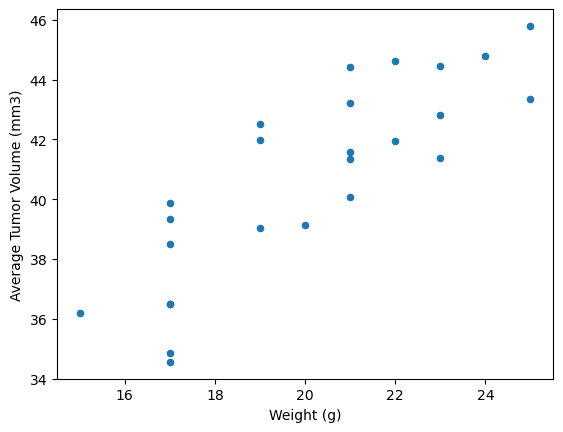

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin = clean_mice.loc[(clean_mice["Drug Regimen"] == "Capomulin") ]


capomulin_avg = capomulin.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()

capomulin_avg.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()






## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


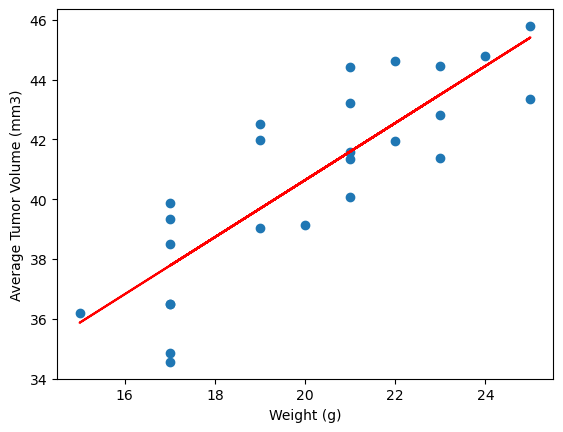

In [32]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

x_axis = capomulin.groupby("Mouse ID")["Weight (g)"].mean()
y_axis = capomulin.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()


(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)


regress_values = x_axis * slope + intercept

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
r_value = st.pearsonr(x_axis, y_axis)
print(f"The correlation between mouse weight and the average tumor volume is {round(r_value[0],2)}")
plt.show()